<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Manually-grouping-EMP-biomes" data-toc-modified-id="Manually-grouping-EMP-biomes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Manually grouping EMP biomes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-3.0.0.1"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Load-EMP" data-toc-modified-id="Load-EMP-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load EMP</a></span><ul class="toc-item"><li><span><a href="#Sample-biomes" data-toc-modified-id="Sample-biomes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sample biomes</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Taxonomy</a></span></li><li><span><a href="#EMP-taxon-abundance" data-toc-modified-id="EMP-taxon-abundance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>EMP taxon abundance</a></span></li></ul></li><li><span><a href="#Identifying-'biome-specific'-taxa" data-toc-modified-id="Identifying-'biome-specific'-taxa-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Identifying 'biome-specific' taxa</a></span><ul class="toc-item"><li><span><a href="#IndVal" data-toc-modified-id="IndVal-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>IndVal</a></span></li><li><span><a href="#Summary-of-EMP-samples-used" data-toc-modified-id="Summary-of-EMP-samples-used-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Summary of EMP samples used</a></span><ul class="toc-item"><li><span><a href="#Writing-table" data-toc-modified-id="Writing-table-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Writing table</a></span></li></ul></li></ul></li><li><span><a href="#Indval-for-animal-gut" data-toc-modified-id="Indval-for-animal-gut-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Indval for animal gut</a></span><ul class="toc-item"><li><span><a href="#indval-by-mammalia-vs-non-mammalia" data-toc-modified-id="indval-by-mammalia-vs-non-mammalia-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>indval by mammalia vs non-mammalia</a></span></li></ul></li><li><span><a href="#Comparing-indvals" data-toc-modified-id="Comparing-indvals-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Comparing indvals</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Signficant-indvals" data-toc-modified-id="Signficant-indvals-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Signficant indvals</a></span></li><li><span><a href="#Significant-by-env" data-toc-modified-id="Significant-by-env-7.0.2"><span class="toc-item-num">7.0.2&nbsp;&nbsp;</span>Significant by env</a></span></li><li><span><a href="#Significant-by-biome?" data-toc-modified-id="Significant-by-biome?-7.0.3"><span class="toc-item-num">7.0.3&nbsp;&nbsp;</span>Significant by biome?</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Mapping genera between `animal gut` and `emp` datasets to determine the env distribution of genera
* Using very general source category
  * Comparing relative abundances among sources

In [123]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP/'

# representative OTU sequences for Georg animal dataset
rep_seq_qza_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/rep-seqs_merged_filt_r5k.qza'

# physeq of OTUs
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

# emp files (downloaded from EMP FTP site)
## EMP OTU table
emp_otu_file = file.path(work_dir, 'emp_deblur_90bp.subset_2k.rare_5000.tsv')
## EMP OTU summary table
emp_otu_sum_file = file.path(work_dir, 'otu_summary_no_chl.emp_deblur_90bp.subset_2k.rare_5000.tsv')
## mapping file that contains sample metadata (eg., BIOME)
emp_map_file = file.path(work_dir, 'emp_qiime_mapping_qc_filtered.tsv')

# params
threads = 24

# Init

In [124]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R') 

In [125]:
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP/ 


# Manually grouping EMP biomes

* Making very general categories

In [126]:
# EMP sample metadata
emp_map = data.table::fread(emp_map_file, sep='\t') %>%
    dplyr::select(SampleID, study_id, env_biome, env_feature, env_material,
                  envo_biome_0, envo_biome_1, envo_biome_2, envo_biome_3,
                  envo_biome_4, envo_biome_5) %>%
    filter(envo_biome_2 != '',
           env_material != '') %>%
    distinct(env_feature, env_material, envo_biome_0, envo_biome_1, envo_biome_2) 
    
emp_map %>% dfhead

[1] 151   5


env_feature,env_material,envo_biome_0,envo_biome_1,envo_biome_2
human-associated habitat,feces,biome,terrestrial biome,anthropogenic terrestrial biome
human-associated habitat,sebum,biome,terrestrial biome,anthropogenic terrestrial biome
human-associated habitat,saliva,biome,terrestrial biome,anthropogenic terrestrial biome


In [5]:
F = file.path(work_dir, 'biome_material.tsv')
write.table(emp_map, F, sep='\t', row.names=FALSE, quote=FALSE)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP//biome_material.tsv 


#### Notes

* Manually added grouping info
* New file: `/ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP//biome_material_edit.tsv`

# Load EMP

## Sample biomes

In [127]:
# adding manually-group biome info
F = file.path(work_dir, 'biome_material_edit.tsv')
biome_info = read.delim(F, sep='\t') 
biome_info %>% dfhead

[1] 151   6


env_feature,env_material,envo_biome_0,envo_biome_1,envo_biome_2,source_general
human-associated habitat,feces,biome,terrestrial biome,anthropogenic terrestrial biome,Human
human-associated habitat,sebum,biome,terrestrial biome,anthropogenic terrestrial biome,Human
human-associated habitat,saliva,biome,terrestrial biome,anthropogenic terrestrial biome,Human


In [128]:
# EMP sample metadata
emp_map = data.table::fread(emp_map_file, sep='\t') %>%
    dplyr::select(SampleID, study_id, env_biome, env_feature, env_material,
                  envo_biome_0, envo_biome_1, envo_biome_2, envo_biome_3,
                  envo_biome_4, envo_biome_5) %>%
    filter(envo_biome_2 != '',
           env_material != '') %>%
    inner_join(biome_info, 
               c('env_feature', 'env_material',
                 'envo_biome_0', 'envo_biome_1',
                 'envo_biome_2', 'env_material'))
    
emp_map %>% dfhead

Warning message:
“Column `env_feature` joining character vector and factor, coercing into character vector”Warning message:
“Column `env_material` joining character vector and factor, coercing into character vector”Warning message:
“Column `envo_biome_0` joining character vector and factor, coercing into character vector”Warning message:
“Column `envo_biome_1` joining character vector and factor, coercing into character vector”Warning message:
“Column `envo_biome_2` joining character vector and factor, coercing into character vector”

[1] 23622    12


SampleID,study_id,env_biome,env_feature,env_material,envo_biome_0,envo_biome_1,envo_biome_2,envo_biome_3,envo_biome_4,envo_biome_5,source_general
550.L1S1.s.1.sequence,550,urban biome,human-associated habitat,feces,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,,Human
550.L1S10.s.1.sequence,550,urban biome,human-associated habitat,feces,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,,Human
550.L1S100.s.1.sequence,550,urban biome,human-associated habitat,feces,biome,terrestrial biome,anthropogenic terrestrial biome,dense settlement biome,urban biome,,Human


## Taxonomy

In [129]:
# animal gut dataset OTU taxonomy
tax = physeq_file %>%
    readRDS %>%
    tax_table %>%
    as.matrix %>% 
    as.data.frame %>%
    distinct(Domain, Phylum, Class, Order, Family, Genus)

tax %>% dfhead

[1] 879   6


Domain,Phylum,Class,Order,Family,Genus
Bacteria,Candidate division SR1,unclassified,unclassified,unclassified,unclassified
Bacteria,Candidate division SR1,uncultured bacterium,,,
Bacteria,Candidate division SR1,uncultured candidate division SR1 bacterium,,,


In [130]:
emp_otu_sum = data.table::fread(emp_otu_sum_file, sep='\t') %>%
    dplyr::select(sequence, taxonomy) %>%
    separate(taxonomy, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';') %>%
    mutate(Domain = gsub('^k__', '', Domain),
           Phylum = gsub('^ p__', '', Phylum),
           Class = gsub('^ c__', '', Class),
           Order = gsub('^ o__', '', Order),
           Family = gsub('^ f__', '', Family),
           Genus = gsub('^ g__', '', Genus)) %>%
    dplyr::select(-Species) %>%
    semi_join(tax, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus'))

emp_otu_sum %>% dfhead

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 76882 rows [5, 6, 7, 10, 14, 24, 48, 50, 51, 79, 82, 85, 87, 94, 98, 100, 109, 115, 116, 118, ...].”Warning message:
“Column `Domain` joining character vector and factor, coercing into character vector”Warning message:
“Column `Phylum` joining character vector and factor, coercing into character vector”Warning message:
“Column `Class` joining character vector and factor, coercing into character vector”Warning message:
“Column `Order` joining character vector and factor, coercing into character vector”Warning message:
“Column `Family` joining character vector and factor, coercing into character vector”Warning message:
“Column `Genus` joining character vector and factor, coercing into character vector”

[1] 8315    7


sequence,Domain,Phylum,Class,Order,Family,Genus
TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGTCCTTTAAGTCTGATGTGAAAGCCCACGGCTCAAC,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus
TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGTGCGTAGGCGGGTCTTTAAGTCAGGGGTGAAATCCTGGAGCTCAAC,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Bradyrhizobium
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAAC,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus


## EMP taxon abundance

* Abundance of each taxonomic group in each sample

In [131]:
#cmd = 'head -n 1000 %s'
cmd = 'cat %s'
cmd = sprintf(cmd, emp_otu_file)

otu = data.table::fread(cmd, sep='\t') %>%
    gather(Sample, Abundance, -OTU_ID) %>%
    # joining by taxonomy and summing abundances by genus
    inner_join(emp_otu_sum, c('OTU_ID'='sequence')) %>%
    # summing abundances for each 
    group_by(Sample, Domain, Phylum, Class, Order, Family, Genus) %>%
    summarize(Abundance = sum(Abundance)) %>%
    ungroup()

otu %>% dfhead

[1] 456000      8


Sample,Domain,Phylum,Class,Order,Family,Genus,Abundance
1001.SKB2,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,0
1001.SKB2,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,0
1001.SKB2,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera,0


In [132]:
# adding relative abundance
otu$Abundance %>% summary %>% print
otu = otu %>%
    mutate(Rel_Abund = Abundance / 5000 * 100)

otu$Rel_Abund %>% summary %>% print

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    0.000    0.000    4.303    0.000 4999.000 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.00000  0.00000  0.08605  0.00000 99.98000 


# Identifying 'biome-specific' taxa

## IndVal

In [133]:
# wide taxon table
otu_w = otu %>%
    unite(Taxonomy, Domain, Phylum, Class, Order, Family, Genus, sep=';') %>%
    dplyr::select(Taxonomy, Sample, Rel_Abund) %>%
    spread(Sample, Rel_Abund) %>%
    as.data.frame

rownames(otu_w) = otu_w$Taxonomy
otu_w$Taxonomy = NULL
otu_w = otu_w %>% t

otu_w %>% dim %>% print

[1] 2000  228


In [134]:
# indval 'clusters'
clusts = emp_map %>% 
    filter(source_general != 'other',
           source_general != 'Other') %>%
    distinct(SampleID, source_general) %>%
    mutate(source_general = source_general %>% as.character)

rownames(clusts) = clusts$SampleID
clusts$SampleID = NULL
samp_int = intersect(rownames(clusts), rownames(otu_w))
clusts = clusts[samp_int,]
clusts %>% table

.
  Animal    Human Sediment     Soil    Water 
     317      206      259      193      242 

In [135]:
# indval (filtering any taxon absent from all samples)
totals = otu_w[samp_int,] %>% colSums
indval_source_general = labdsv::indval(otu_w[samp_int,totals > 0], clusts)
indval_source_general %>% names

[1] "relfrq" "relabu" "indval" "maxcls" "indcls" "pval"   "error"

In [136]:
# summary of scores
indval_source_general$indval %>%
    summary

     Animal              Human              Sediment        
 Min.   :0.0000000   Min.   :0.0000000   Min.   :0.000e+00  
 1st Qu.:0.0008221   1st Qu.:0.0003298   1st Qu.:0.000e+00  
 Median :0.0087890   Median :0.0096458   Median :7.237e-05  
 Mean   :0.0343818   Mean   :0.0649339   Mean   :1.528e-02  
 3rd Qu.:0.0353257   3rd Qu.:0.0673937   3rd Qu.:4.927e-03  
 Max.   :0.3129444   Max.   :0.7929495   Max.   :3.120e-01  
      Soil               Water          
 Min.   :0.0000000   Min.   :0.0000000  
 1st Qu.:0.0000000   1st Qu.:0.0000000  
 Median :0.0001342   Median :0.0002022  
 Mean   :0.0411644   Mean   :0.0148605  
 3rd Qu.:0.0120780   3rd Qu.:0.0063606  
 Max.   :0.6590193   Max.   :0.5128832  

## Summary of EMP samples used

In [137]:
emp_map %>% 
    filter(source_general != 'other',
           source_general != 'Other') %>%
    distinct(SampleID, source_general) %>%
    mutate(source_general = source_general %>% as.character) %>%
    dfhead

[1] 18941     2


SampleID,source_general
550.L1S1.s.1.sequence,Human
550.L1S10.s.1.sequence,Human
550.L1S100.s.1.sequence,Human


In [263]:
# indval 'clusters'
clusts = emp_map %>% 
    filter(source_general != 'other',
           source_general != 'Other') %>%
    distinct(SampleID, study_id, env_biome, env_feature, 
             env_material, source_general) %>%
    mutate(source_general = source_general %>% as.character) %>%
    filter(SampleID %in% rownames(otu_w)) 

clusts$source_general %>% table %>% print
clusts %>% dfhead

.
  Animal    Human Sediment     Soil    Water 
     317      206      259      193      242 
[1] 1217    6


SampleID,study_id,env_biome,env_feature,env_material,source_general
550.L1S116.s.1.sequence,550,urban biome,human-associated habitat,feces,Human
550.L1S119.s.1.sequence,550,urban biome,human-associated habitat,feces,Human
550.L1S164.s.1.sequence,550,urban biome,human-associated habitat,feces,Human


### Writing table

In [265]:
F = file.path(work_dir, 'EMP_sample_biome_summary.tsv')
write.table(clusts, F, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S/env_dist/EMP//EMP_sample_biome_summary.tsv 


# Indval for animal gut

In [50]:
# metdata
metadata = physeq_file %>%
    readRDS %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame %>%
    dplyr::select(X.SampleID, class, order, family, genus, diet, sample_type) 

metadata %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213   7


,X.SampleID,class,order,family,genus,diet,sample_type
X1.Eurasian.Beaver,X1.Eurasian.Beaver,Mammalia,Rodentia,Castoridae,Castor,herbivore,feces
X101.Horse,X101.Horse,Mammalia,Perissodactyla,Equidae,Equus,herbivore,feces
X102.Kulan,X102.Kulan,Mammalia,Perissodactyla,Equidae,Equus,herbivore,feces


In [45]:
# OTUs
otu = physeq_file %>%
    readRDS %>%
    otu_table %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(OTU = rownames(.)) %>%
    gather(Sample, Rel_Abund, -OTU) %>%
    mutate(Rel_Abund = Rel_Abund / 5000 * 100)

otu %>% dfhead

[1] 6451770       3


OTU,Sample,Rel_Abund
ea2df9bcd7f6a10e0fa509d237d19c6d,X1.Eurasian.Beaver,0
130b094f31455943fb20899a36af8afd,X1.Eurasian.Beaver,0
b9b9562a0f34ad60c552f7f46d7a4b3b,X1.Eurasian.Beaver,0


In [46]:
# taxonomy
tax = physeq_file %>%
    readRDS %>%
    tax_table %>%
    as.matrix %>% 
    as.data.frame %>%
    mutate(OTU = rownames(.))

tax %>% dfhead

[1] 30290     8


Domain,Phylum,Class,Order,Family,Genus,Species,OTU
Bacteria,Candidate division SR1,unclassified,unclassified,unclassified,unclassified,unclassified,ea2df9bcd7f6a10e0fa509d237d19c6d
Bacteria,Candidate division SR1,uncultured bacterium,,,,,130b094f31455943fb20899a36af8afd
Bacteria,Candidate division SR1,uncultured bacterium,,,,,b9b9562a0f34ad60c552f7f46d7a4b3b


In [47]:
# summing by genus
otu = otu %>%
    inner_join(tax, c('OTU')) %>%
    group_by(Sample, Domain, Phylum, Class, Order, Family, Genus) %>%
    summarize(Rel_Abund = sum(Rel_Abund)) %>%
    ungroup()

otu$Rel_Abund %>% summary %>% print
otu %>% dfhead

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1138  0.0000 98.6800 
[1] 187227      8


Sample,Domain,Phylum,Class,Order,Family,Genus,Rel_Abund
F141.Wood.Sandpiper,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,uncultured,0
F141.Wood.Sandpiper,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,0
F141.Wood.Sandpiper,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,0


## indval by mammalia vs non-mammalia

In [103]:
# converting to side
otu_w = otu %>%
    unite(Taxonomy, Domain, Phylum, Class, Order, Family, Genus, sep=';') %>%
    dplyr::select(Taxonomy, Sample, Rel_Abund) %>%
    spread(Sample, Rel_Abund) %>%
    as.data.frame 

rownames(otu_w) = otu_w$Taxonomy
otu_w$Taxonomy = NULL
otu_w = otu_w %>% t

otu_w %>% dim %>% print

[1] 213 879


In [104]:
# indval 'clusters'
clusts = metadata %>% 
    mutate(cluster = ifelse(class == 'Mammalia', 'Mammalia', 'Non-mammalia')) %>%
    dplyr::select(X.SampleID, cluster) %>%
    rename('SampleID' = X.SampleID)

rownames(clusts) = clusts$SampleID
clusts$SampleID = NULL
samp_int = intersect(rownames(clusts), rownames(otu_w))
clusts = clusts[samp_int,]
clusts %>% table

.
    Mammalia Non-mammalia 
         160           53 

In [105]:
# indval (filtering any taxon absent from all samples)
totals = otu_w[samp_int,] %>% colSums
indval_mammalia = labdsv::indval(otu_w[samp_int,totals > 0], clusts)
indval_mammalia %>% names

[1] "relfrq" "relabu" "indval" "maxcls" "indcls" "pval"   "error"

In [106]:
# summary of scores
indval_mammalia$indval %>%
    summary

    Mammalia        Non-mammalia      
 Min.   :0.00000   Min.   :0.0000000  
 1st Qu.:0.00000   1st Qu.:0.0002096  
 Median :0.00625   Median :0.0188679  
 Mean   :0.05633   Mean   :0.0322737  
 3rd Qu.:0.03734   3rd Qu.:0.0377358  
 Max.   :0.80137   Max.   :0.5992922  

# Comparing indvals

In [148]:
tax_int = intersect(rownames(indval_mammalia$indval), 
                    rownames(indval_source_general$indval))

indval_j = cbind(indval_mammalia$indval[tax_int,],
                 indval_source_general$indval[tax_int,])

pval_j %>% nrow %>% print
indval_j %>% dfhead

[1] 223
[1] 223   7


,Mammalia,Non-mammalia,Animal,Human,Sediment,Soil,Water
Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanobacterium,0.0000000,0.018867925,6.784927e-05,3.651544e-05,1.616998e-02,0.3101302,2.212007e-03
Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanobrevibacter,0.3784692,0.011546246,2.436897e-01,1.587287e-02,6.390651e-06,0.0000000,3.660024e-06
Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanosphaera,0.1434221,0.008043611,1.322370e-01,6.887222e-04,0.000000e+00,0.0000000,0.000000e+00


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/6_source_classifier/02_env_dist/.figures/1c37789fd7cefa54a612b94e3e648a62.svg 


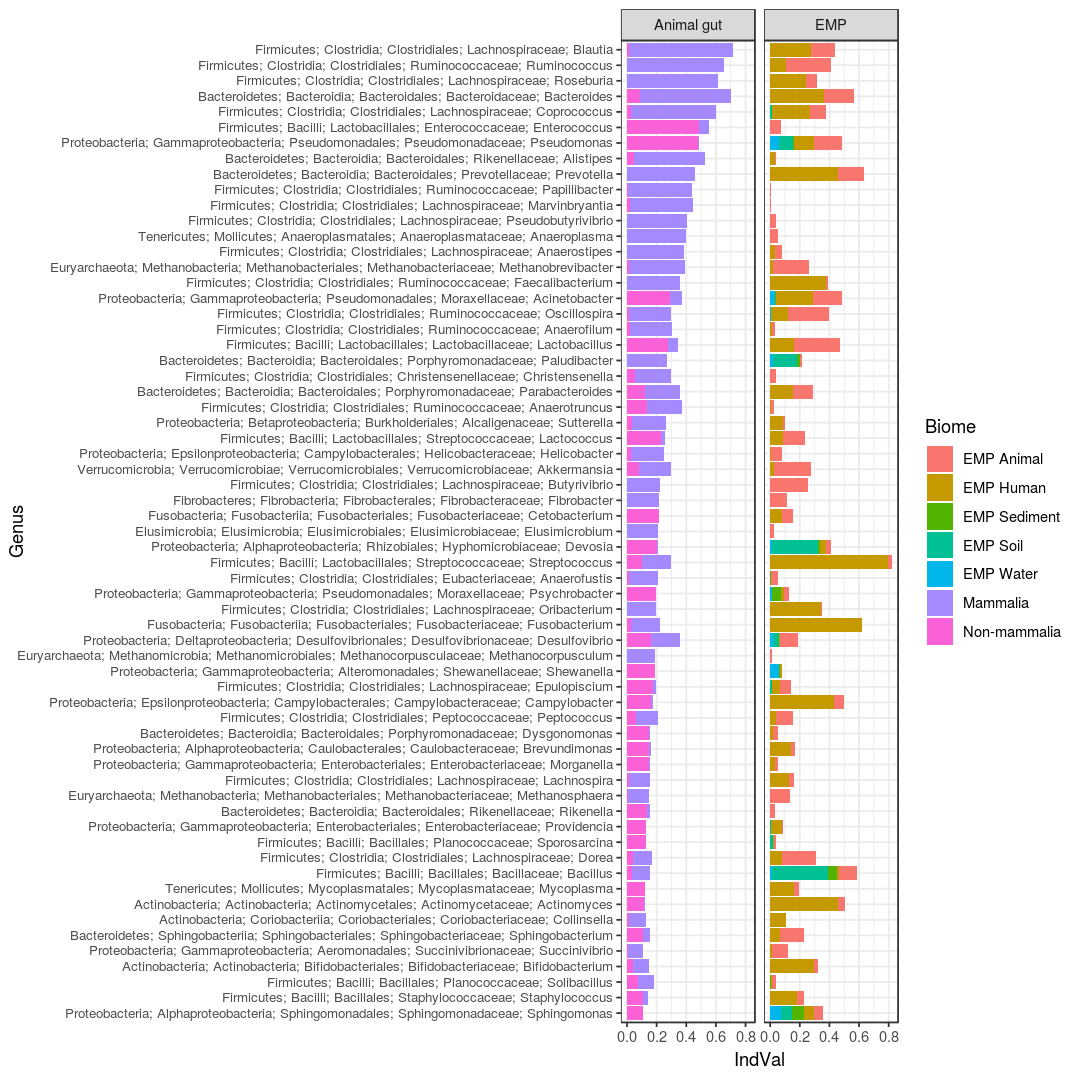

In [122]:
# all indvals above effect size cutoff
p = indval_j %>%
    mutate(Taxon = rownames(.)) %>%
    gather(Biome, IndVal, -Taxon) %>%
    mutate(Dataset = grepl('mammalia', Biome, ignore.case=TRUE),
           Dataset = ifelse(Dataset == TRUE, 'Animal gut', 'EMP'),
           Biome = ifelse(Dataset == 'EMP', gsub('^', 'EMP ', Biome), Biome)) %>%
    group_by(Taxon) %>%
    mutate(Max_IndVal = max(ifelse(Dataset == 'Animal gut', IndVal, 0))) %>%
    ungroup() %>%
    filter(Max_IndVal > 0.1) %>%
    mutate(Taxon = gsub('\\.', '; ', Taxon),
           Taxon = gsub('^[^;]+; ', '', Taxon),
           Taxon = Taxon %>% reorder(Max_IndVal)) %>%
    ggplot(aes(Taxon, IndVal, fill=Biome)) +
    geom_bar(stat='identity') +
    coord_flip() +
    facet_grid(. ~ Dataset) +
    labs(x='Genus') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    )

options(repr.plot.width=9, repr.plot.height=9)
Plot(p)

### Signficant indvals

In [217]:
pval_j = cbind(indval_mammalia$pval[tax_int],
               indval_source_general$pval[tax_int])
colnames(pval_j) = c('mammalia', 'env')

In [218]:
pval_j = pval_j %>%
    as.data.frame %>% 
    mutate(taxon = rownames(.),
           mammalia_adj = mammalia %>% as.Num %>% p.adjust(method='BH'),
           env_adj = env %>% as.Num %>% p.adjust(method='BH'))

pval_j %>% summary %>% print

    mammalia           env             taxon            mammalia_adj    
 Min.   :0.0010   Min.   :0.00100   Length:223         Min.   :0.01487  
 1st Qu.:0.0205   1st Qu.:0.00100   Class :character   1st Qu.:0.08090  
 Median :0.2420   Median :0.00100   Mode  :character   Median :0.42051  
 Mean   :0.3451   Mean   :0.08186                      Mean   :0.45113  
 3rd Qu.:0.6295   3rd Qu.:0.02100                      3rd Qu.:0.83804  
 Max.   :1.0000   Max.   :1.00000                      Max.   :1.00000  
    env_adj        
 Min.   :0.001742  
 1st Qu.:0.001742  
 Median :0.001742  
 Mean   :0.088197  
 3rd Qu.:0.027955  
 Max.   :1.000000  


In [219]:
# just significant for mammmalia vs non-mammalia
taxa = pval_j %>% 
    filter(mammalia_adj < 0.05,
           env_adj < 0.05) %>% 
    .$taxon
taxa %>% length %>% print

indval_j_sig = indval_j[taxa,] 
indval_j_sig %>% dfhead

[1] 33
[1] 33  7


,Mammalia,Non-mammalia,Animal,Human,Sediment,Soil,Water
Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanobrevibacter,0.378469222,0.01154625,0.243689673,0.01587287,6.390651e-06,0.000000e+00,3.660024e-06
Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinomyces,0.006948916,0.11737882,0.046336045,0.45973315,4.175530e-04,3.251732e-05,7.145086e-04
Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Varibaculum,0.000000000,0.09433962,0.001394288,0.17959934,0.000000e+00,0.000000e+00,5.778832e-06


In [220]:
# For sig, mammalia dominant or non-mammalia?
colnames(indval_j_sig) = gsub('-', '_', colnames(indval_j_sig))
indval_j_sig = indval_j_sig %>%
    mutate(Taxon = rownames(.),
           Mammalia_specific = ifelse(Mammalia > Non_mammalia, 
                                      'Mammalia-specific', 
                                      'Non-Mammalia-specific'))
indval_j_sig %>% dfhead

[1] 33  9


Mammalia,Non_mammalia,Animal,Human,Sediment,Soil,Water,Taxon,Mammalia_specific
0.378469222,0.01154625,0.243689673,0.01587287,6.390651e-06,0.000000e+00,3.660024e-06,Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanobrevibacter,Mammalia-specific
0.006948916,0.11737882,0.046336045,0.45973315,4.175530e-04,3.251732e-05,7.145086e-04,Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinomyces,Non-Mammalia-specific
0.000000000,0.09433962,0.001394288,0.17959934,0.000000e+00,0.000000e+00,5.778832e-06,Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Varibaculum,Non-Mammalia-specific


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/6_source_classifier/02_env_dist/.figures/476ea8f0d5e912d596549a58f5d57936.svg 


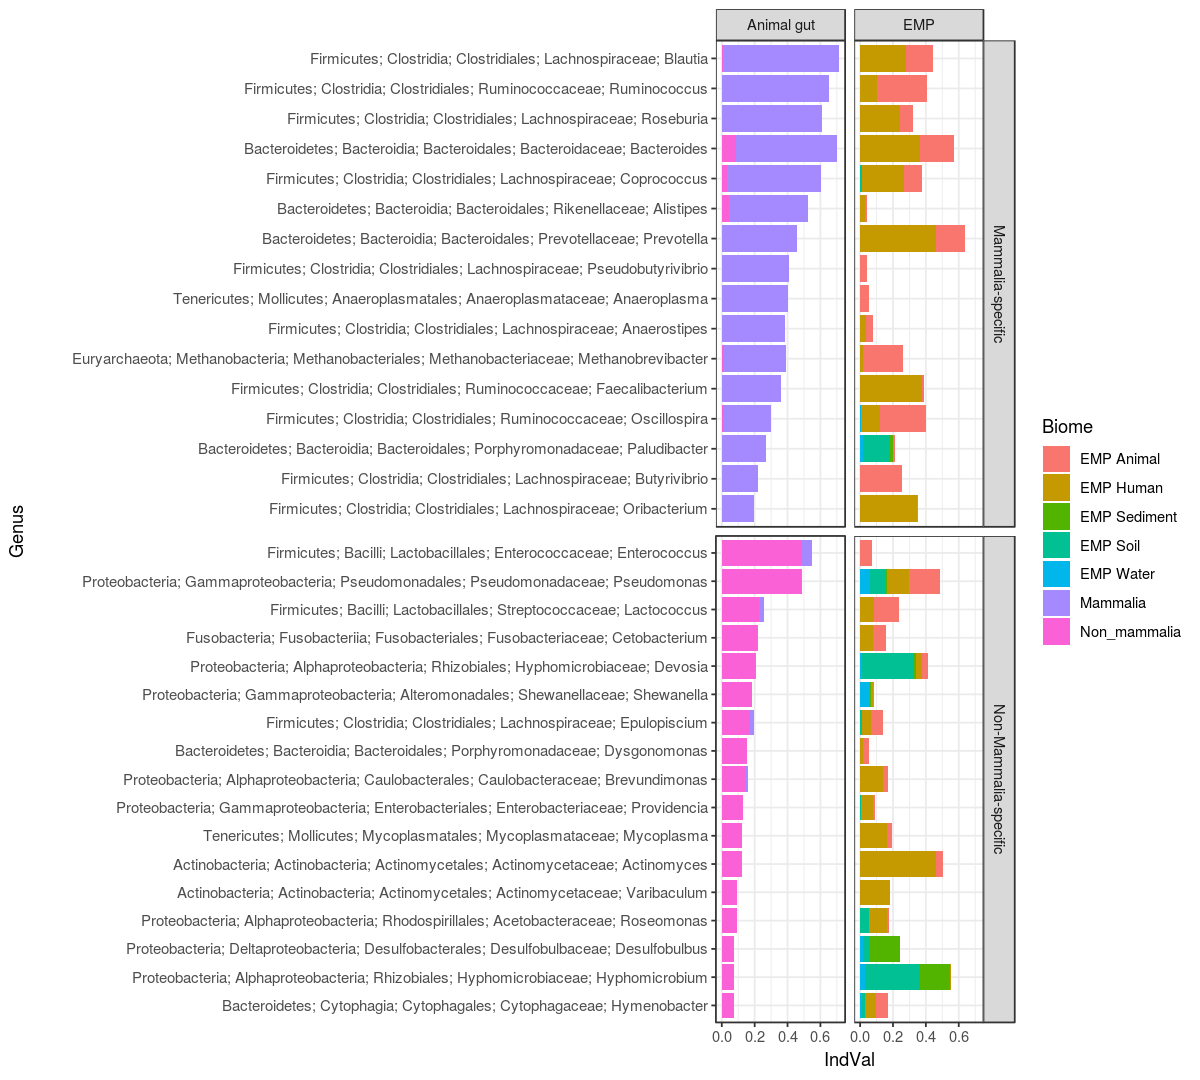

In [221]:
# all indvals above effect size cutoff
p = indval_j_sig %>%
    gather(Biome, IndVal, -Taxon, -Mammalia_specific) %>%
    mutate(Dataset = grepl('mammalia', Biome, ignore.case=TRUE),
           Dataset = ifelse(Dataset == TRUE, 'Animal gut', 'EMP'),
           Biome = ifelse(Dataset == 'EMP', gsub('^', 'EMP ', Biome), Biome)) %>%
    group_by(Taxon) %>%
    mutate(Max_IndVal = max(ifelse(Dataset == 'Animal gut', IndVal, 0))) %>%
    ungroup() %>%
    mutate(Taxon = gsub('\\.', '; ', Taxon),
           Taxon = gsub('^[^;]+; ', '', Taxon),
           Taxon = Taxon %>% reorder(Max_IndVal)) %>%
    ggplot(aes(Taxon, IndVal, fill=Biome)) +
    geom_bar(stat='identity') +
    coord_flip() +
    facet_grid(Mammalia_specific ~ Dataset, scales='free_y') +
    labs(x='Genus') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9)
    )

options(repr.plot.width=10, repr.plot.height=9)
Plot(p)

### Significant by env

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/6_source_classifier/02_env_dist/.figures/808ebec4afd8ca9c8e4308e5329b94d6.svg 


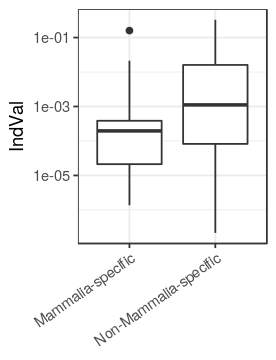

In [248]:
to_rm = c('EMP Animal', 'EMP Human', 'Mammalia', 'Non_mammalia')

indval_j_sig_f = indval_j_sig %>%
    gather(Biome, IndVal, -Taxon, -Mammalia_specific) %>%
    mutate(Dataset = grepl('mammalia', Biome, ignore.case=TRUE),
           Dataset = ifelse(Dataset == TRUE, 'Animal gut', 'EMP'),
           Biome = ifelse(Dataset == 'EMP', gsub('^', 'EMP ', Biome), Biome)) %>%
    filter(!Biome %in% to_rm,
           IndVal > 1e-10)

p = indval_j_sig_f %>%
    ggplot(aes(Mammalia_specific, IndVal)) +
    geom_boxplot() +
    scale_y_log10() +
    scale_color_discrete('IndVal-inferred\nSpecificity') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=35, hjust=1)
    )

options(repr.plot.width=2.3, repr.plot.height=3)
Plot(p)

In [245]:
wilcox.test(IndVal ~ Mammalia_specific, data=indval_j_sig_f) %>% print


	Wilcoxon rank sum test

data:  IndVal by Mammalia_specific
W = 495, p-value = 0.005662
alternative hypothesis: true location shift is not equal to 0



### Significant by biome?

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/6_source_classifier/02_env_dist/.figures/f48556e1528a93989ce3791939068508.svg 


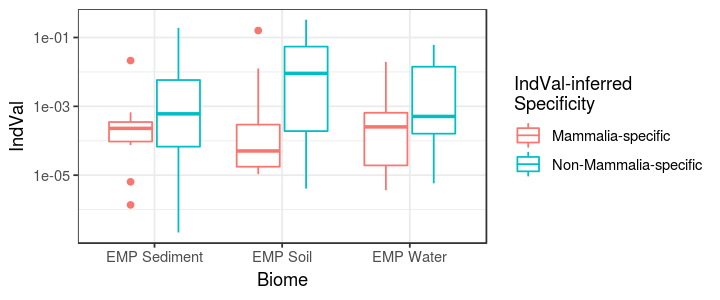

In [230]:
to_rm = c('EMP Animal', 'EMP Human', 'Mammalia', 'Non_mammalia')

indval_j_sig_f = indval_j_sig %>%
    gather(Biome, IndVal, -Taxon, -Mammalia_specific) %>%
    mutate(Dataset = grepl('mammalia', Biome, ignore.case=TRUE),
           Dataset = ifelse(Dataset == TRUE, 'Animal gut', 'EMP'),
           Biome = ifelse(Dataset == 'EMP', gsub('^', 'EMP ', Biome), Biome)) %>%
    filter(!Biome %in% to_rm,
           IndVal > 1e-10)

p = indval_j_sig_f %>%
    ggplot(aes(Biome, IndVal, color=Mammalia_specific)) +
    geom_boxplot() +
    scale_y_log10() +
    scale_color_discrete('IndVal-inferred\nSpecificity') +
    theme_bw() 

options(repr.plot.width=6, repr.plot.height=2.5)
Plot(p)

In [223]:
# anova
aov_res = aov(log10(IndVal) ~ Mammalia_specific + Biome, data=indval_j_sig_f) 
aov_res %>% summary %>% print

                  Df Sum Sq Mean Sq F value  Pr(>F)   
Mammalia_specific  1  14.99  14.993   8.202 0.00542 **
Biome              2   2.35   1.177   0.644 0.52807   
Residuals         75 137.09   1.828                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [224]:
TukeyHSD(aov_res, 'Biome') %>% print

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log10(IndVal) ~ Mammalia_specific + Biome, data = indval_j_sig_f)

$Biome
                              diff        lwr       upr     p adj
EMP Soil-EMP Sediment   0.40790626 -0.5071890 1.3230015 0.5381167
EMP Water-EMP Sediment  0.07277279 -0.8003378 0.9458834 0.9783478
EMP Water-EMP Soil     -0.33513346 -1.2272199 0.5569529 0.6430717



# sessionInfo

In [225]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq_ecoPhy/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq_ecoPhy/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gdtools_0.1.7   bindrcpp_0.2.2  phyloseq_1.22.3 ggplot2_3.0.0  
[5] tidyr_0.8.1     dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17        svglite_1.2.1       ape_5.1            
 [4] lattice_0.20-34     Biostrings_2.46.0   assertthat_0.2.0   
 [7] digest_0.6.15       foreach_1.4.4       IRdisplay_0.4.4    
[10] R6_2.2.2            plyr_1.8.4          repr_0.15.0        
[13] stats4_3.4.1        evaluate_0.10.1     pillar_1.2.2       
[16] zlibbioc_1.24.0     rlang_0.2.1         lazyev